<a href="https://colab.research.google.com/github/Harlequelrah/Learning_data_analysis/blob/main/Learning_data_analysis/Courses/Partie_3/Familiarisez-vous_avec_les_mesures_de_concentration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Familiarisez-vous avec les mesures de concentration

Nous avons recours à `la courbe de lorenz` .

## La courbe de lorenz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv(
    "https://raw.githubusercontent.com/Harlequelrah/Learning_data_analysis/refs/heads/main/Learning_data_analysis/Nettoyez_et_analysez_votre_jeu_de_données/data/operations_clean.csv",
    parse_dates=[0],
)
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


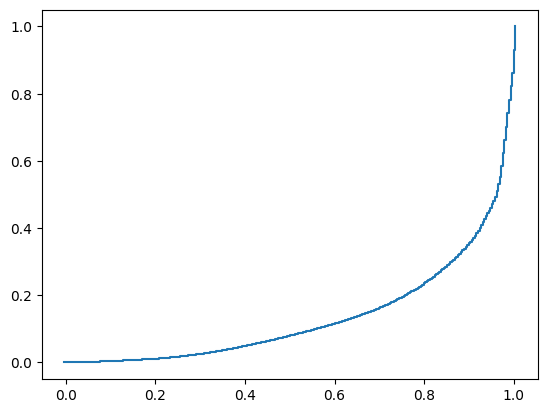

In [ ]:
from matplotlib.lines import drawStyles
depenses = data[data['montant']<0]
# récuperer toutes les dépenses

dep = -depenses['montant'].values
# rendre positif les valeurs

n = len(dep)
# recuperer le nombre de dépenses

lorenz = np.cumsum(np.sort(dep))/dep.sum()

lorenz = np.append([0],lorenz)
# La courbe commence à 0


xaxis = np.linspace(0-1/n,1+1/n,n+1)
# ça commence par 0-1/n , ça se termine par 1+1/n et le pas est de n+1

plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

# Appréhendez l'indice de Gini
Il mesure l'aire restant entre la première bissectrice et la courbe de lorenz

$Gini = 2 \times S $

In [ ]:
AUC = (lorenz.sum()-lorenz[-1]/2 - lorenz[0]/2)/2
# Surface sous la courbe de lorenz

S = 0.5 - AUC
# Surface entre la première bissectrice et la courbe de lorenz

gini = 2*S
gini

np.float64(-39.67617186009485)

Indice de Gini varie entre 0 et 1 :

- G=0 → égalité parfaite : tous ont la même richesse

- G=1 → inégalité totale : une seule personne possède tout